# Visualization of Example Graphs in `pyotc`
This notebook visualizes example graphs provided in the `pyotc.examples` module.

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## 1. Lollipop Graphs

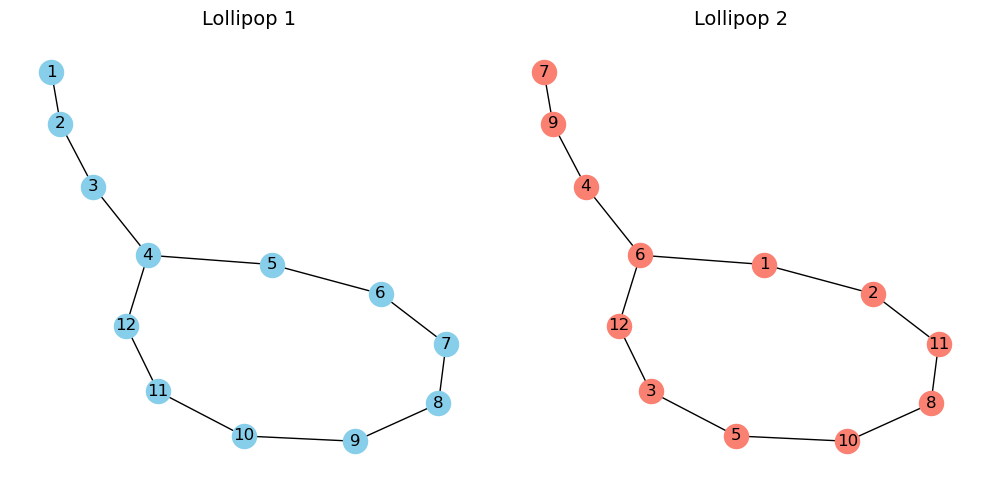

In [2]:
from pyotc.examples.lollipops import lollipop_1, lollipop_2

# Compute a common layout based on lollipop_1 and map the layout to lollipop_2 using node correspondence
pos1 = nx.spring_layout(lollipop_1, seed=42)
inverse_mapping = {1: 5, 2: 6, 6: 4, 4: 3, 9: 2, 7: 1, 11: 7, 8: 8, 10: 9, 5: 10, 3: 11, 12: 12}
pos2 = {node: pos1[inverse_mapping[node]] for node in lollipop_2.nodes()}

# Visualization
plt.figure(figsize=(10, 5))

# Plot left graph
plt.subplot(1, 2, 1)
nx.draw(lollipop_1, pos=pos1, with_labels=True, node_color="skyblue", arrows=True)
plt.title("Lollipop 1", fontsize=14)

# Plot right graph with aligned layout
plt.subplot(1, 2, 2)
nx.draw(lollipop_2, pos=pos2, with_labels=True, node_color="salmon", arrows=True)
plt.title("Lollipop 2", fontsize=14)

plt.tight_layout()
plt.show()


## 2. Edge Awareness Example Graphs

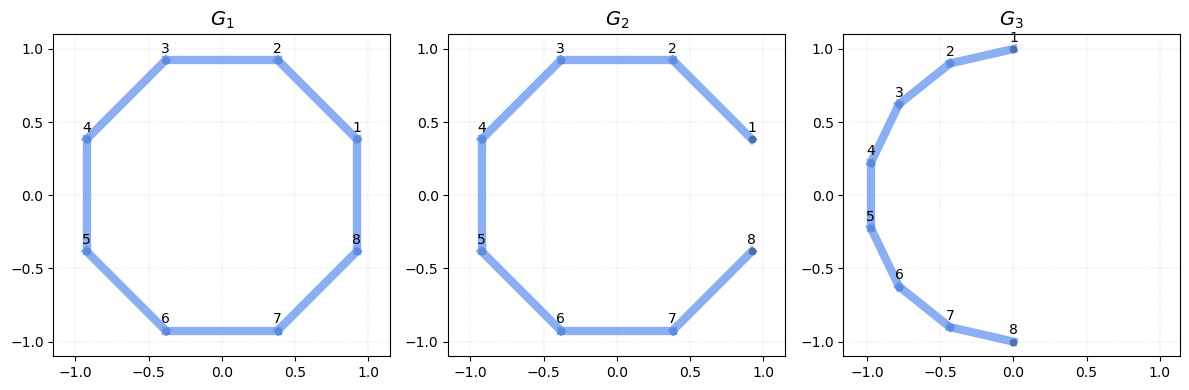

In [3]:
from pyotc.examples.edge_awareness import graph_1, graph_2, graph_3, d1, d2, d3

# Mapping: node id (1~8) -> coordinate
pos1 = {i+1: d1[i] for i in range(8)}
pos2 = {i+1: d2[i] for i in range(8)}
pos3 = {i+1: d3[i] for i in range(8)}

# Function to draw graph in desired style
def draw_clean_graph(G, pos, title):
    for u, v in G.edges():
        x_vals = [pos[u][0], pos[v][0]]
        y_vals = [pos[u][1], pos[v][1]]
        plt.plot(x_vals, y_vals, color='cornflowerblue', linewidth=6, alpha=0.75)

    for node in G.nodes():
        x, y = pos[node]
        plt.scatter(x, y, color='black', s=20)
        plt.text(x, y + 0.05, str(node), fontsize=10, ha='center')

    plt.axis('equal')
    plt.xticks(np.linspace(-1, 1, 5))
    plt.yticks(np.linspace(-1, 1, 5))
    plt.ylim(-1.1, 1.1)
    plt.grid(True, linestyle="--", linewidth=0.3, alpha=0.5)
    plt.title(title, fontsize=14, fontstyle='italic')

# Plot all three graphs side by side
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
draw_clean_graph(graph_1, pos1, r"$G_1$")

plt.subplot(1, 3, 2)
draw_clean_graph(graph_2, pos2, r"$G_2$")

plt.subplot(1, 3, 3)
draw_clean_graph(graph_3, pos3, r"$G_3$")

plt.tight_layout()
plt.show()

## 3. Stochastic Block Models

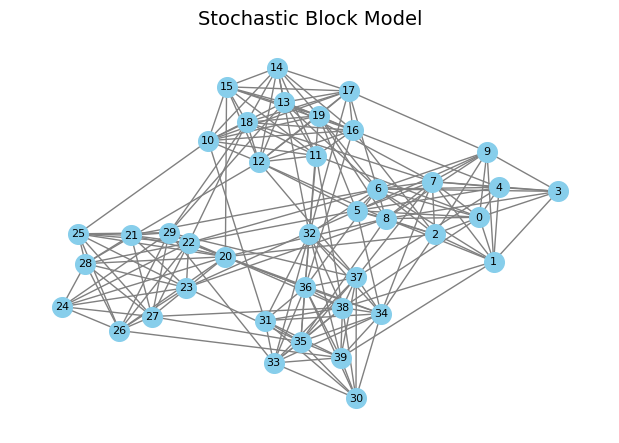

In [4]:
from pyotc.examples.stochastic_block_model import stochastic_block_model

# Seed number
np.random.seed(1009)

# Generate a stochastic block model graph with 4 blocks, each containing 10 nodes
m = 10
A = stochastic_block_model(
    (m, m, m, m),
    np.array(
        [
            [0.9, 0.1, 0.1, 0.1],
            [0.1, 0.9, 0.1, 0.1],
            [0.1, 0.1, 0.9, 0.1],
            [0.1, 0.1, 0.1, 0.9],
        ]
    ),
)
G = nx.from_numpy_array(A)

# Plot graph
plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=200, font_size=8)
plt.title("Stochastic Block Model", fontsize=14)
plt.show()

## 4. Wheel Graphs

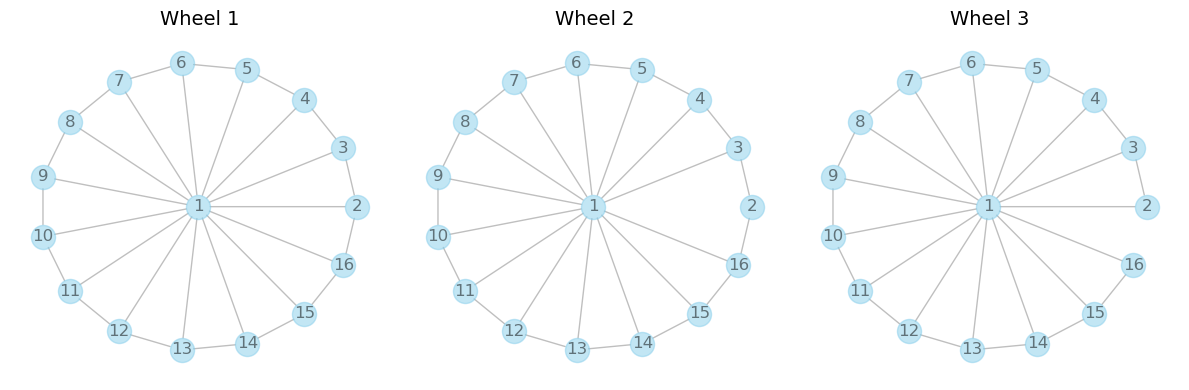

In [5]:
from pyotc.examples.wheel import wheel_1, wheel_2, wheel_3

# Use the same position layout for all 3 graphs
pos = {1: [0, 0]}
for i in range(2, 17):
    pos[i] = [np.cos(2 * (i - 2) * np.pi / 15), np.sin(2 * (i - 2) * np.pi / 15)]
        
# Plot the 3 graphs side by side
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
nx.draw(wheel_1, pos=pos, with_labels=True, node_color="skyblue", arrows=True, edge_color="gray", alpha=0.5)
plt.title("Wheel 1", fontsize=14)

plt.subplot(1, 3, 2)
nx.draw(wheel_2, pos=pos, with_labels=True, node_color="skyblue", arrows=True, edge_color="gray", alpha=0.5)
plt.title("Wheel 2", fontsize=14)

plt.subplot(1, 3, 3)
nx.draw(wheel_3, pos=pos, with_labels=True, node_color="skyblue", arrows=True, edge_color="gray", alpha=0.5)
plt.title("Wheel 3", fontsize=14)

plt.tight_layout()
plt.show()